In [1]:
import bnlearn as bn
import pandas as pd
import numpy as np

C:\Users\javie\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\javie\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df=pd.read_csv('../data/hotel_bookings.csv') #cargamos datos
print(df.columns) # veo columnas
df.head()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# prepoceso

In [3]:
df.notna().sum().sort_values(ascending=True) #compruebo integridad de los datos, elimino company, muy pocos datos, elimino filas con datos restandes de agente country y children

company                             6797
agent                             103050
country                           118902
children                          119386
hotel                             119390
total_of_special_requests         119390
required_car_parking_spaces       119390
adr                               119390
customer_type                     119390
days_in_waiting_list              119390
deposit_type                      119390
booking_changes                   119390
assigned_room_type                119390
reserved_room_type                119390
previous_bookings_not_canceled    119390
previous_cancellations            119390
distribution_channel              119390
reservation_status                119390
market_segment                    119390
meal                              119390
babies                            119390
adults                            119390
stays_in_week_nights              119390
stays_in_weekend_nights           119390
arrival_date_day

In [4]:
'''df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day'''


df.drop(['company'],axis=1,inplace=True)
df.drop(['arrival_date_year'],axis=1,inplace=True)
df.drop(['reservation_status_date'],axis=1,inplace=True)
df.drop(['reservation_status'],axis=1,inplace=True)
df.drop(['reserved_room_type'],axis=1,inplace=True)
#df.drop(['lead_time'],axis=1,inplace=True)

df['children'].fillna(0,inplace=True)
df["meal"].replace({"Undefined": "SC", }, inplace=True) #las reservas con regimen sin definir las convertimos en reservas sin regimen 
df['country'].fillna('Unkown',inplace=True)
df['agent'].fillna(-1,inplace=True)
filter = (df.children != 0) | (df.adults != 0) | (df.babies != 0)
df.children=df.children.astype(int)
df.adr=df.adr.astype(int)
df.agent=df.agent.astype(int)
df=df[filter]

In [5]:
print(dfnum_train.columns.shape) 
df.columns.shape

NameError: name 'dfnum_train' is not defined

In [ ]:
df.notna().sum().sort_values(ascending=True)

hotel                             119210
adr                               119210
customer_type                     119210
days_in_waiting_list              119210
agent                             119210
deposit_type                      119210
booking_changes                   119210
assigned_room_type                119210
previous_bookings_not_canceled    119210
previous_cancellations            119210
is_repeated_guest                 119210
distribution_channel              119210
required_car_parking_spaces       119210
market_segment                    119210
meal                              119210
babies                            119210
children                          119210
adults                            119210
stays_in_week_nights              119210
stays_in_weekend_nights           119210
arrival_date_day_of_month         119210
arrival_date_week_number          119210
arrival_date_month                119210
lead_time                         119210
is_canceled     

# divido las variables numericas en categoricas haciendo bins para que los datos esten distribuidos de igual manera en las gategorias en lugar de tener muchas categorias con pocos datos

In [ ]:
df.adr.describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
'''bins = [-7, 69, 95, 126, 5401]
labels = [1,2,3,4]
df['adr'] = pd.cut(df['adr'], bins=bins, labels=labels).astype(int)'''

"bins = [-7, 69, 95, 126, 5401]\nlabels = [1,2,3,4]\ndf['adr'] = pd.cut(df['adr'], bins=bins, labels=labels).astype(int)"

In [ ]:
df.agent.describe()

count    119210.000000
mean         74.752512
std         107.264823
min          -1.000000
25%           7.000000
50%           9.000000
75%         152.000000
max         535.000000
Name: agent, dtype: float64

In [ ]:
'''labels = [1,2,3,4]
df['agent'] = pd.cut(df['agent'], bins=4, labels=labels).astype(int)'''

"labels = [1,2,3,4]\ndf['agent'] = pd.cut(df['agent'], bins=4, labels=labels).astype(int)"

In [ ]:
df.agent

0          -1.0
1          -1.0
2          -1.0
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119210, dtype: float64

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,C,3,No Deposit,-1.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,C,4,No Deposit,-1.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,C,0,No Deposit,-1.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,A,0,No Deposit,240.0,0,Transient,98.0,0,1


# Creacion del modelo

In [8]:
dfhot,dfnum=bn.df2onehot(df)
#dfhot_train, dfnum_train = bn.df2onehot(X_train)
#dfhot_test, dfnum_test = bn.df2onehot(X_test)

  0%|          | 0/27 [00:00<?, ?it/s]


[df2onehot] >Auto detecting dtypes.


100%|██████████| 27/27 [00:11<00:00,  2.34it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 27/27 [00:30<00:00,  1.13s/it]


[df2onehot] >Total onehot features: 1363


In [9]:
from sklearn.model_selection import train_test_split

dfnum_train,dfnum_test=train_test_split(dfnum,test_size=0.01,random_state=42)
print(dfnum_train.shape,dfnum_test.shape)

(118017, 27) (1193, 27)


In [14]:
from sklearn.feature_selection import SelectKBest

aux=SelectKBest(k=15)
aux.fit_transform(dfnum_train.drop(['is_canceled'],axis=1),dfnum_train['is_canceled'])
k_filter = aux.get_support()
features = np.array(dfnum_train.drop(['is_canceled'],axis=1).columns)
 

print("Selected best 15:")
print(features[k_filter])
(dfnum_train[features[k_filter]].head())
dfnum_train_15k=dfnum_train[features[k_filter]]
dfnum_train_15k['is_canceled']=dfnum_train['is_canceled']
dfnum_test_15k=dfnum_test[features[k_filter]]
dfnum_test_15k['is_canceled']=dfnum_test['is_canceled']
dfnum_train_15k.columns

Selected best 15:
['hotel' 'stays_in_week_nights' 'adults' 'country' 'distribution_channel'
 'is_repeated_guest' 'previous_cancellations'
 'previous_bookings_not_canceled' 'assigned_room_type' 'booking_changes'
 'deposit_type' 'days_in_waiting_list' 'customer_type'
 'required_car_parking_spaces' 'total_of_special_requests']


Index(['hotel', 'stays_in_week_nights', 'adults', 'country',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


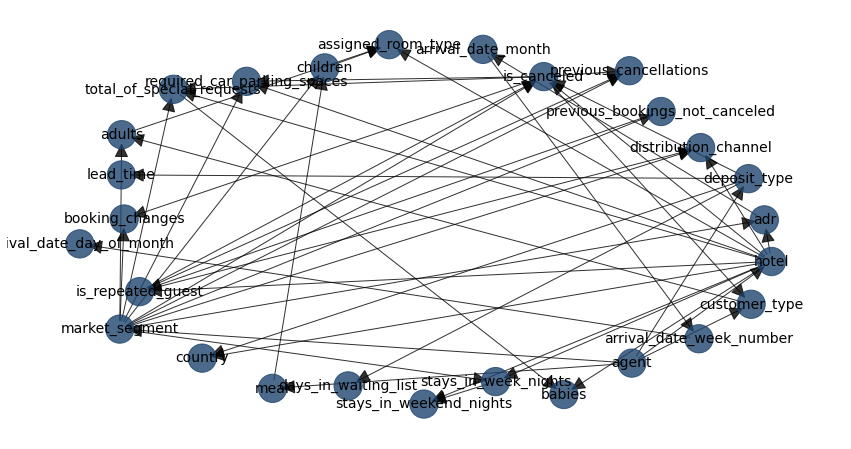

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


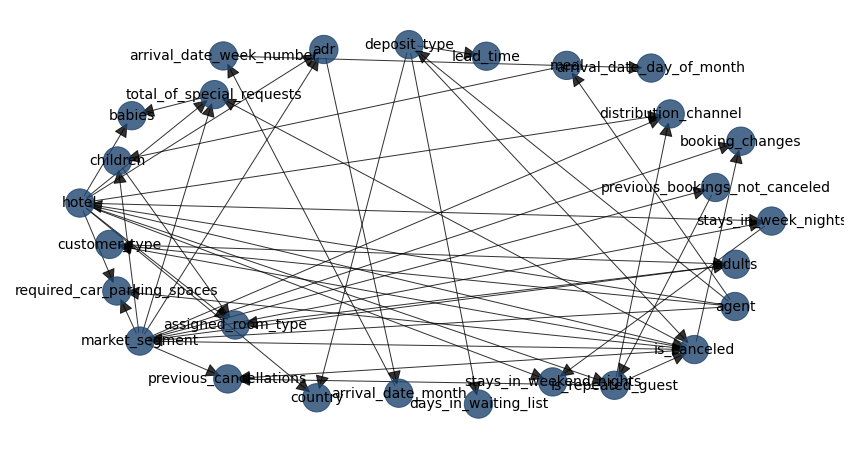

{'pos': {'hotel': array([-0.99226958,  0.1107754 ]),
  'is_canceled': array([ 0.77781876, -0.67392245]),
  'lead_time': array([0.17851994, 0.89725816]),
  'arrival_date_month': array([-0.07352421, -0.90779291]),
  'arrival_date_week_number': array([-0.57897742,  0.8986273 ]),
  'arrival_date_day_of_month': array([0.65306925, 0.83380507]),
  'stays_in_weekend_nights': array([ 0.36976215, -0.84723061]),
  'stays_in_week_nights': array([1.        , 0.01430289]),
  'adults': array([ 0.89674294, -0.21703788]),
  'children': array([-0.8840684 ,  0.33612118]),
  'babies': array([-0.84245746,  0.57866864]),
  'meal': array([0.41003062, 0.84814646]),
  'country': array([-0.3098687 , -0.93227205]),
  'market_segment': array([-0.81927927, -0.62846463]),
  'distribution_channel': array([0.70817197, 0.58823417]),
  'is_repeated_guest': array([ 0.54743052, -0.8653493 ]),
  'previous_cancellations': array([-0.56622126, -0.83125258]),
  'previous_bookings_not_canceled': array([0.83840853, 0.19422614])

In [15]:
DAG = bn.structure_learning.fit(dfnum_train)
bn.plot(DAG)
model = bn.parameter_learning.fit(DAG, dfnum_train,methodtype="bayes",verbose=1)
model = bn.independence_test(model, df, test='chi_square',alpha=0.05)
bn.plot(DAG)

[bnlearn] >Computing best DAG using [naivebayes]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


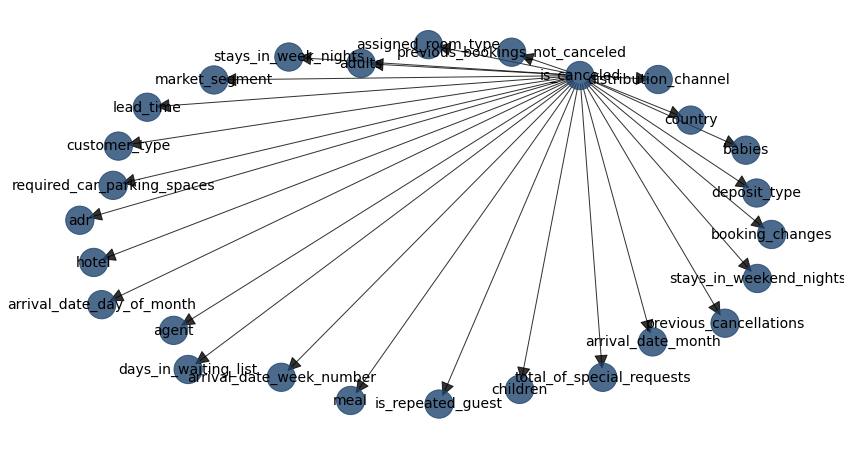

In [19]:

DAG = bn.structure_learning.fit(dfnum_train,methodtype='naivebayes', root_node="is_canceled")
bn.plot(DAG)
model = bn.parameter_learning.fit(DAG, dfnum_train,methodtype="bayes",verbose=1)

Building tree:   7%|▋         | 24/351.0 [00:00<00:01, 233.70it/s]

[bnlearn] >Computing best DAG using [tan]


Building tree: 100%|██████████| 351/351.0 [00:02<00:00, 163.47it/s]


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


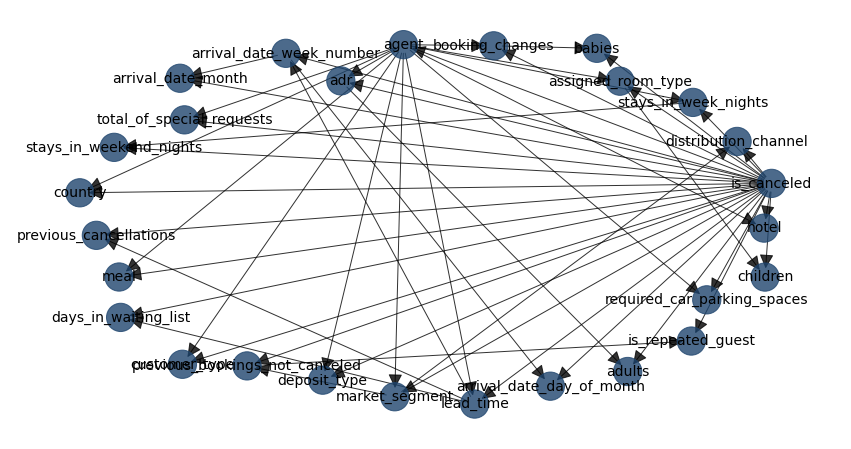

In [73]:
DAG = bn.structure_learning.fit(dfnum_train,methodtype='tan', class_node="is_canceled")
bn.plot(DAG)
model = bn.parameter_learning.fit(DAG, dfnum_train,methodtype="bayes",verbose=1)

Building tree:   9%|▉         | 24/253.0 [00:00<00:01, 225.53it/s]

[bnlearn] >Computing best DAG using [chow-liu]


Building tree: 100%|██████████| 253/253.0 [00:01<00:00, 150.59it/s]


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


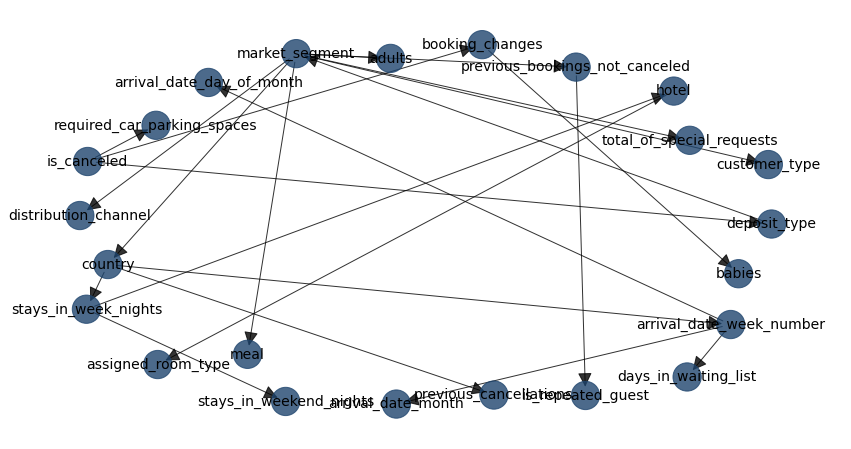

In [57]:
DAG = bn.structure_learning.fit(dfnum_train,methodtype='cl', root_node="is_canceled")
bn.plot(DAG)
model = bn.parameter_learning.fit(DAG, dfnum_train,methodtype="bayes",verbose=1)

In [14]:
DAG = bn.structure_learning.fit(dfnum_train,methodtype='cs')
bn.plot(DAG)
model = bn.parameter_learning.fit(DAG, dfnum_train,methodtype="bayes",verbose=1)

Working for n conditional variables: 0:   0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Computing best DAG using [cs]


Working for n conditional variables: 2:  40%|████      | 2/5 [09:03<15:56, 318.97s/it]

In [40]:
len(bn.get_node_properties(model))

[bnlearn]> Set node properties.


23

In [41]:
#predic = bn.predict(model, evidence, verbose=0,variables=['is_canceled'])
#print(predic)
dfnum_train.shape


(118017, 23)

In [11]:
evidence=dfnum_test.drop(['is_canceled'],axis=1)
print(evidence.shape)
dict(evidence.iloc[0])

(1193, 26)


{'hotel': 0,
 'lead_time': 321,
 'arrival_date_month': 6,
 'arrival_date_week_number': 20,
 'arrival_date_day_of_month': 26,
 'stays_in_weekend_nights': 1,
 'stays_in_week_nights': 11,
 'adults': 3,
 'children': 1,
 'babies': 1,
 'meal': 3,
 'country': 25,
 'market_segment': 6,
 'distribution_channel': 4,
 'is_repeated_guest': 0,
 'previous_cancellations': 1,
 'previous_bookings_not_canceled': 1,
 'assigned_room_type': 1,
 'booking_changes': 1,
 'deposit_type': 1,
 'agent': 184,
 'days_in_waiting_list': 1,
 'customer_type': 4,
 'adr': 17,
 'required_car_parking_spaces': 1,
 'total_of_special_requests': 1}

In [16]:
'''q1=bn.inference.fit(model,variables=['is_canceled'], evidence={'hotel':1,'distribution_channel':2})
print(q1)'''
predic=bn.inference.fit(model,variables=['is_canceled'], evidence=  dict(evidence.iloc[0]))
print(predic)
dfnum_test['is_canceled'].iloc[0]

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]n Order: : : 0it [00:00, ?it/s]

+----+---------------+----------+
|    |   is_canceled |        p |
+====+===============+==========+
|  0 |             0 | 0.763518 |
+----+---------------+----------+
|  1 |             1 | 0.236482 |
+----+---------------+----------+
+----------------+--------------------+
| is_canceled    |   phi(is_canceled) |
+================+====================+
| is_canceled(0) |             0.7635 |
+----------------+--------------------+
| is_canceled(1) |             0.2365 |
+----------------+--------------------+


0

In [20]:
predic = bn.predict(model, evidence, verbose=1,variables=['is_canceled'])
#print(predic)

100%|██████████| 1167/1167 [02:40<00:00,  7.25it/s]


In [20]:
predic['is_canceled'].values
dfnum_test['is_canceled'].values

array([0, 0, 1, ..., 1, 0, 0])

In [17]:
predic=[]

for i in range(len(evidence)):
    predic.append(bn.inference.fit(model,variables=['is_canceled'],verbose=0,to_df=False, evidence=  dict(evidence.iloc[i])))
    

print(predic[0:5])
print((evidence.iloc[0]))
X_test['is_canceled'][1]

[<DiscreteFactor representing phi(is_canceled:2) at 0x1b54b1b94c0>, <DiscreteFactor representing phi(is_canceled:2) at 0x1b5836b2d00>, <DiscreteFactor representing phi(is_canceled:2) at 0x1b54b1b9160>, <DiscreteFactor representing phi(is_canceled:2) at 0x1b54b1b99a0>, <DiscreteFactor representing phi(is_canceled:2) at 0x1b54b1b9c70>]
hotel                               0
lead_time                           0
arrival_date_year                   3
arrival_date_month                  6
arrival_date_week_number           19
arrival_date_day_of_month          26
stays_in_weekend_nights             1
stays_in_week_nights                3
adults                              2
babies                              0
meal                                2
country                             6
market_segment                      4
distribution_channel                3
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type

0

In [21]:
from sklearn import metrics

print(metrics.classification_report(dfnum_test['is_canceled'].values,predic['is_canceled'].values))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       769
           1       0.76      0.57      0.65       424

    accuracy                           0.78      1193
   macro avg       0.77      0.73      0.75      1193
weighted avg       0.78      0.78      0.77      1193



In [ ]:
''' Naive bayes

 precision    recall  f1-score   support

           0       0.79      0.92      0.85       769
           1       0.79      0.55      0.65       424

    accuracy                           0.79      1193
   macro avg       0.79      0.74      0.75      1193
weighted avg       0.79      0.79      0.78      1193


'''

''' Bayessian network

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       769
           1       0.79      0.59      0.67       424

    accuracy                           0.80      1193
   macro avg       0.80      0.75      0.76      1193
weighted avg       0.80      0.80      0.79      1193
'''

''' BN 15k

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       769
           1       0.77      0.52      0.62       424

    accuracy                           0.77      1193
   macro avg       0.77      0.72      0.73      1193
weighted avg       0.77      0.77      0.76      1193



'''

''' TAN
         precision    recall  f1-score   support

           0       0.82      0.90      0.86       769
           1       0.78      0.63      0.70       424

    accuracy                           0.81      1193
   macro avg       0.80      0.77      0.78      1193
weighted avg       0.80      0.81      0.80      1193


'''

''' TAN 15k

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       769
           1       0.78      0.59      0.67       424

    accuracy                           0.79      1193
   macro avg       0.79      0.75      0.76      1193
weighted avg       0.79      0.79      0.79      1193



'''





''' CHO LIU

            precision    recall  f1-score   support

           0       0.73      1.00      0.84       769
           1       1.00      0.33      0.50       424

    accuracy                           0.76      1193
   macro avg       0.87      0.67      0.67      1193
weighted avg       0.83      0.76      0.72      1193



'''






In [43]:
print(X_test.drop(['is_canceled'],axis=1).columns.values)

['hotel' 'lead_time' 'arrival_date_year' 'arrival_date_month'
 'arrival_date_week_number' 'arrival_date_day_of_month'
 'stays_in_weekend_nights' 'stays_in_week_nights' 'adults' 'children'
 'babies' 'meal' 'country' 'market_segment' 'distribution_channel'
 'is_repeated_guest' 'previous_cancellations'
 'previous_bookings_not_canceled' 'reserved_room_type'
 'assigned_room_type' 'booking_changes' 'deposit_type' 'agent'
 'days_in_waiting_list' 'customer_type' 'adr'
 'required_car_parking_spaces' 'total_of_special_requests'
 'reservation_status' 'reservation_status_date']


In [47]:
predic=bn.inference.fit(model,variables=['hotel','meal', 'reservation_status_date'], evidence=  {'is_canceled':1})
print(predic)

[bnlearn] >Variable Elimination..


Eliminating: arrival_date_year: 100%|██████████| 11/11 [00:00<00:00, 23.57it/s]